# Zeb Project

### Loading the necessary packages

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
##feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

## Loading the data

In [4]:
# Loading the data
df = pd.read_excel('data/dataset_2023.xlsx')
df = df.drop('Unnamed: 0', axis=1)

## Extracting the numerical features via Pipeline

In [5]:
def replaceComma(text):
    if "." in str(text): 
        return str("".join(str(text).split("."))).replace(",",".")
    else:
        return str(text).replace(",",".")

def removeLetters(text):
    return "".join(c for c in text if c.isdigit() or c == ".")

def removeThousandPoint(text):
    return str(text).replace(".","")

from datetime import datetime
from dateutil.relativedelta import relativedelta

def calculate_age(registration_date):
    if registration_date == "Neuwagen":
        return 0
    else:
        today = datetime.now()
        date = datetime.strptime(registration_date, "%m/%Y")
        delta = relativedelta(today, date)
        return (delta.years * 12) + delta.months
    
def getConsumption(consumption):
    return str(consumption).split()[0] 

In [6]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.base import BaseEstimator, TransformerMixin

class AgeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        def calculate_age(registration_date):
            if registration_date == "Neuwagen":
                return 0
            else:
                today = datetime.now()
                date = datetime.strptime(registration_date, "%m/%Y")
                delta = relativedelta(today, date)
                return (delta.years * 12) + delta.months
        
        X_copy = X.copy()
        X_copy["first_registration"] = X_copy["first_registration"].apply(calculate_age) 
        X_copy["first_registration"] = X_copy["first_registration"].replace('', np.nan)
        X_copy["first_registration"] = X_copy["first_registration"].replace('nan', np.nan)
        X_copy["first_registration"] = pd.to_numeric(X_copy["first_registration"], errors='coerce')

        return X_copy
    
class getConsumption(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        def getConsumption(consumption):
            return str(consumption).split()[0]
        
        X_copy = X.copy()
        X_copy['consumption'] = X_copy['consumption'].apply(getConsumption)
        X_copy["consumption"] = X_copy["consumption"].apply(replaceComma) 
        X_copy["consumption"] = X_copy["consumption"].replace('', np.nan)
        X_copy["consumption"] = X_copy["consumption"].replace('nan', np.nan)
        X_copy["consumption"] = pd.to_numeric(X_copy["consumption"], errors='coerce')

        return X_copy

class transformMilage(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X_copy = X.copy()
        X_copy["milage"] = X_copy["milage"].apply(replaceComma)
        X_copy["milage"] = X_copy["milage"].apply(removeLetters)   
        X_copy["milage"] = X_copy["milage"].replace('', np.nan)
        X_copy["milage"] = X_copy["milage"].replace('nan', np.nan)
        X_copy["milage"] = pd.to_numeric(X_copy["milage"], errors='coerce')

        return X_copy   
    
class transformDuration (BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X_copy = X.copy()
        X_copy["duration"] = X_copy["duration"].apply(replaceComma)
        X_copy["duration"] = X_copy["duration"].apply(removeLetters)   
        X_copy["duration"] = X_copy["duration"].replace('', np.nan)
        X_copy["duration"] = X_copy["duration"].replace('nan', np.nan)
        X_copy["duration"] = pd.to_numeric(X_copy["duration"], errors='coerce')

        return X_copy    
    
class transformFee (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X_copy = X.copy()
        X_copy["monthly_fee"] = X_copy["monthly_fee"].apply(replaceComma)
        X_copy["monthly_fee"] = X_copy["monthly_fee"].apply(removeLetters)    
        X_copy["monthly_fee"] = X_copy["monthly_fee"].replace('', np.nan)
        X_copy["monthly_fee"] = X_copy["monthly_fee"].replace('nan', np.nan)
        X_copy["monthly_fee"] = pd.to_numeric(X_copy["monthly_fee"], errors='coerce')

        return X_copy    
    
class transformEmission (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X_copy = X.copy()
        X_copy["emission_value"] = X_copy["emission_value"].apply(replaceComma)
        X_copy["emission_value"] = X_copy["emission_value"].apply(removeLetters)   
        X_copy["emission_value"] = X_copy["emission_value"].replace('', np.nan)
        X_copy["emission_value"] = X_copy["emission_value"].replace('nan', np.nan)
        X_copy["emission_value"] = pd.to_numeric(X_copy["emission_value"], errors='coerce')
        
        return X_copy 
    
class transformHorsepower (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X_copy = X.copy()
        X_copy["horsepower"] = X_copy["horsepower"].apply(replaceComma)
        X_copy["horsepower"] = X_copy["horsepower"].apply(removeLetters)
        X_copy["horsepower"] = X_copy["horsepower"].replace('', np.nan)
        X_copy["horsepower"] = X_copy["horsepower"].replace('nan', np.nan)   
        X_copy["horsepower"] = pd.to_numeric(X_copy["horsepower"], errors='coerce')
     
        return X_copy 
    
    
class transformKilowatts (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X_copy = X.copy()
        X_copy["kilowatts"] = X_copy["kilowatts"].apply(replaceComma)
        X_copy["kilowatts"] = X_copy["kilowatts"].apply(removeLetters) 
        X_copy["kilowatts"] = X_copy["kilowatts"].replace('', np.nan)
        X_copy["kilowatts"] = X_copy["kilowatts"].replace('nan', np.nan) 
        X_copy["kilowatts"] = pd.to_numeric(X_copy["kilowatts"], errors='coerce')
  
        return X_copy 
    
    
class passThrough(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X    
    
    
    

In [7]:
class PandasTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, transformer):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        self.transformer.fit(X, y)
        return self
        
    def transform(self, X):
        transformed = self.transformer.transform(X)
        return pd.DataFrame(transformed, columns=X.columns)

In [8]:
# define the pipeline steps
age_transformer = AgeTransformer()
get_consumption = getConsumption()
pass_through = passThrough()
transform_milage = transformMilage()
transform_duration = transformDuration()
transform_fee = transformFee()
transfrom_emission = transformEmission()
transform_horsepower = transformHorsepower()
transform_kilowatts = transformKilowatts()
imputer_numeric = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer_cat = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
#imputer_cat_NA = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
#imputer_numeric_NA = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

column_transformer = ColumnTransformer([
    ("brand_passthrough", pass_through, ["brand_name"]),
    ("model_name", pass_through, ["model_name"]),
    ("milage", transform_milage, ["milage"]),
    ("age_transformer", age_transformer, ["first_registration"]),
    ("duration", transform_duration, ["duration"]),
    ("gear", pass_through, ["gear"]),
    ("monthly_fee", transform_fee, ["monthly_fee"]),
    ("emission_value", transfrom_emission, ["emission_value"]),
    ("getConsumption", get_consumption, ["consumption"]), 
    ("horsepower", transform_horsepower, ["horsepower"]),
    ("kilowatts", transform_kilowatts, ["kilowatts"]),
    ("fuel_type", pass_through, ["fuel_type"]),
  #  ('cat_imputer', imputer_cat, ['brand_name', "model_name", "gear", "fuel_type"]),
   # ('num_imputer', imputer_numeric, ['milage', 'first_registration', "duration", "monthly_fee", "emission_value", "consumption", "horsepower", "kilowatts"])
    
], remainder="passthrough")



# wrap the column transformer in the PandasTransformer
pipeline = Pipeline([
    ("column_transformer", PandasTransformer(column_transformer)),
   # ("imputer_numeric", PandasTransformer(imputer_numeric)),

])

# fit and transform the data
transformed_df = pipeline.fit_transform(df)





## Final dataset

In [9]:
transformed_df.head()

,brand_name,model_name,milage,first_registration,duration,gear,monthly_fee,emission_value,consumption,horsepower,kilowatts,fuel_type
0,Skoda,Octavia ŠKODA Combi Style TDI DSG,201,2,48,Automatik,574.01,119.0,5.0,150,110,Diesel
1,Volkswagen,T-Cross VW Life TSI,201,2,48,Manuelle Schaltung,382.58,131.0,6.0,95,70,Benzin
2,Seat,Ibiza Austria Edition,15000,7,48,Manuelle Schaltung,239.62,120.0,5.0,80,59,Benzin
3,Volkswagen,Polo VW,1,4,48,Manuelle Schaltung,309.11,127.0,6.0,80,59,Benzin
4,Audi,A4 Avant 40 TDI quattro S line,105301,41,48,Automatik,587.75,138.0,5.0,190,140,Diesel


## Transforming the datatype of the numerical features from object to float (still needs to go in the pipeline)

In [10]:
transformed_df[transformed_df.columns.difference(['brand_name', 'model_name','fuel_type', 'gear' ])] = transformed_df[transformed_df.columns.difference(['brand_name', 'model_name','fuel_type', 'gear' ])].astype(float)

## Splitting the dataset

In [11]:
dfNoRate = transformed_df.drop('monthly_fee', axis=1)  # input features
dfRate = transformed_df['monthly_fee']
X_train, X_test, y_train, y_test = train_test_split(dfNoRate, dfRate, test_size=0.25, shuffle=False)

## Getting numerical columns and categorical columns (dummy variables) for the final pipeline 

In [13]:
## numerical processing pipeline
import numpy as np
numeric_transformer=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="median")),
          ("scaler",StandardScaler())]

)


categorical_transformer = Pipeline(
    steps=[("imputer",SimpleImputer(strategy="constant", fill_value="missing")),
          ("onehot",OneHotEncoder(handle_unknown= "error", sparse_output = False, drop = "first"))]

)


numeric_features = dfNoRate.select_dtypes(include=np.number).columns
categorical_features = dfNoRate.select_dtypes(exclude=["number"]).columns


preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)    
    ])


preprocessor.fit(X_train)

#cat_columns = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names(categorical_features)
#columns_pipeline = np.append(cat_columns, numeric_features)

cat_columns = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_features)
columns_pipeline = np.append(cat_columns, numeric_features)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(DecisionTreeRegressor())),
    ('regressor', DecisionTreeRegressor())
])

param_grid_dt = {
    'preprocessor__cat__onehot__handle_unknown': ['error', 'ignore'], ##!!!!! when you run it without it you get "Value Error: Found unknown categories ..." for the first column PLEASE DEBUG SO MODEL USES EVERYTHING
    'feature_selection__estimator__max_depth': [3, 5, 7],
    'feature_selection__estimator__min_samples_split': [2, 3, 4],
    'feature_selection__estimator__min_samples_leaf': [1, 2],
    'regressor__max_depth': [5, 8, 10],
    'regressor__min_samples_split': [3, 4, 5],
    'regressor__min_samples_leaf': [1, 2]
}


model_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5)
model_dt.fit(X_train, y_train)
y_test_pred_dt = model_dt.predict(X_test)

# Calculate the evaluation metrics
mse_DT = mean_squared_error(y_test, y_test_pred_dt)
mae_DT = mean_absolute_error(y_test, y_test_pred_dt)
r2_DT = r2_score(y_test, y_test_pred_dt)

print("R-squared:", r2_DT)
print("MAE:", mae_DT)
print("MSE:", mse_DT)

R-squared: 0.9326623562363848
MAE: 37.966785380805256
MSE: 6368.041600652974


In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

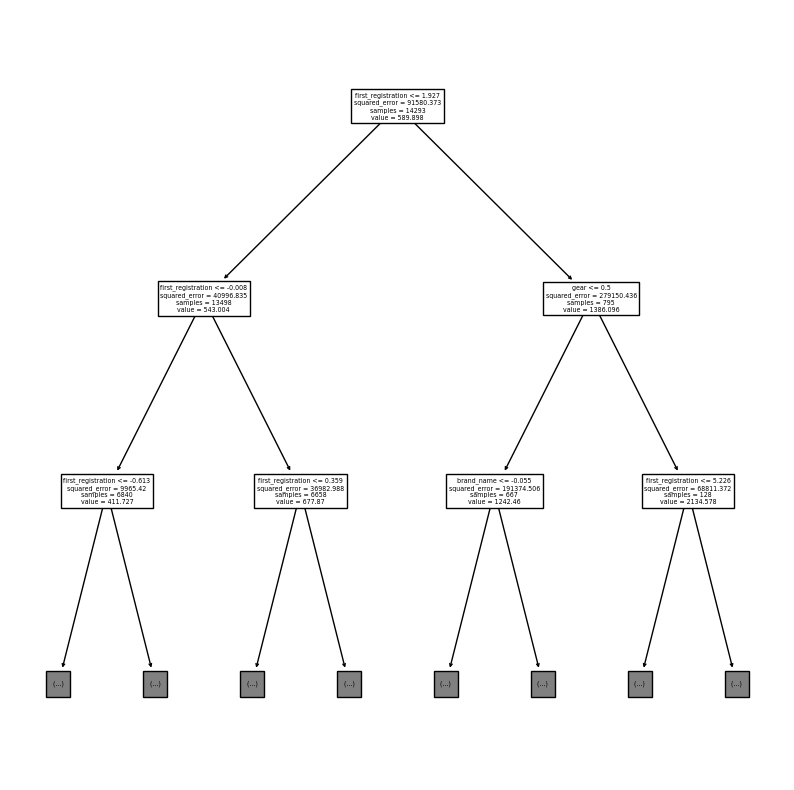

In [32]:
import matplotlib.pyplot as plt
import numpy as np
# Access the best estimator and the decision tree regressor
best_estimator = model_dt.best_estimator_
regressor = best_estimator.named_steps['regressor']

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(regressor, max_depth=2, feature_names=X_train.columns)
plt.show()

In [19]:
from sklearn.datasets import load_iris
from sklearn import tree

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Define the parameter grid
param_grid = {
    'preprocessor__cat__onehot__handle_unknown': ['error', 'ignore'], ##!!!!! when you run it without it you get "Value Error: Found unknown categories ..." for the first column PLEASE DEBUG SO MODEL USES EVERYTHING
    'regressor__n_neighbors': [3, 5, 7],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

# Define the GridSearchCV object
grid_cv = GridSearchCV(pipe, param_grid, cv=5) # turn the number of the grid up and see if your machine can handle it

# Fit the model
grid_cv.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred_knn = grid_cv.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_test_pred_knn)
mae = mean_absolute_error(y_test, y_test_pred_knn)
r2 = r2_score(y_test, y_test_pred_knn)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 1165.9550260572894
Mean Absolute Error: 14.48357941332032
R^2 Score: 0.9876708305138912


In [34]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_jobs=-1))),
    ('regressor', RandomForestRegressor())
])

param_grid_rf = {
    'preprocessor__cat__onehot__handle_unknown': ['error', 'ignore'], ##!!!!! when you run it without it you get "Value Error: Found unknown categories ..." for the first column PLEASE DEBUG SO MODEL USES EVERYTHING
    'feature_selection__estimator__n_estimators': [50, 100],
    'feature_selection__estimator__max_depth': [5, 10],
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [5, 7],
    'regressor__min_samples_split': [2, 4],
    'regressor__min_samples_leaf': [1, 3],
    'regressor__max_features': ['auto', 'sqrt']
}

model_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid_rf, n_iter=20, cv=5)
model_rf.fit(X_train, y_train)
y_test_pred_rf = model_rf.predict(X_test)

# Calculate the evaluation metrics
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R^2 Score:", r2_rf)


Mean Squared Error: 6803.1468500963565
Mean Absolute Error: 54.04770504845828
R^2 Score: 0.9280614185974578


In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

param_grid_xgb = {
    'preprocessor__cat__onehot__handle_unknown': ['error', 'ignore'],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.1, 0.01],
    'regressor__n_estimators': [50, 100],
    'regressor__colsample_bytree': [0.5, 0.7],
    'regressor__subsample': [0.5, 0.7],
    'regressor__gamma': [0, 1]
}

model_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5)
model_xgb.fit(X_train, y_train)
y_test_pred_xgb = model_xgb.predict(X_test)

# Calculate the evaluation metrics
mse_XGB = mean_squared_error(y_test, y_test_pred_xgb)
mae_XGB = mean_absolute_error(y_test, y_test_pred_xgb)
r2_XGB = r2_score(y_test, y_test_pred_xgb)

print("R-squared:", r2_XGB)
print("MAE:", mae_XGB)
print("MSE:", mse_XGB)